In [ ]:
from google.colab import files
uploaded = files.upload()


Saving behaviour_simulation_train.xlsx - Sheet1.csv to behaviour_simulation_train.xlsx - Sheet1.csv


In [ ]:
import pandas as pd

# Load the CSV file (replace with your actual file path)
df = pd.read_csv("behaviour_simulation_train.xlsx - Sheet1.csv")  # replace with your actual path

# Basic data inspection
print(df.shape)         # Shows number of rows and columns
print(df.head())        # Displays the first 5 rows
print(df.info())        # Provides summary info of the DataFrame
print(df.isnull().sum())  # Counts missing values in each column


(17331, 7)
   id                 date  likes  \
0   1  2020-12-12 00:47:00      1   
1   2  2018-06-30 10:04:20   2750   
2   3  2020-09-29 19:47:28     57   
3   4  2020-10-01 11:40:09    152   
4   5  2018-10-19 14:30:46     41   

                                             content        username  \
0  Spend your weekend morning with a Ham, Egg, an...    TimHortonsPH   
1  Watch rapper <mention> freestyle for over an H...       IndyMusic   
2  Canadian Armenian community demands ban on mil...       CBCCanada   
3  1st in Europe to be devastated by COVID-19, It...  MKWilliamsRome   
4  Congratulations to Pauletha Butts of <mention>...           BGISD   

                                               media inferred company  
0  [Photo(previewUrl='https://pbs.twimg.com/media...      tim hortons  
1  [Photo(previewUrl='https://pbs.twimg.com/media...      independent  
2  [Photo(previewUrl='https://pbs.twimg.com/media...              cbc  
3  [Photo(previewUrl='https://pbs.twimg.com/m

In [ ]:
df.dropna(subset=['content', 'username', 'inferred company', 'likes'], inplace=True)
df['media'].fillna('no_media', inplace=True)
df['has_media'] = df['media'].apply(lambda x: x != 'no_media')
df['content'] = df['content'].astype(str).str.strip().str.lower()
df['datetime'] = pd.to_datetime(df['date'], errors='coerce')

<ipython-input-5-58ea6ea02cfc>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['media'].fillna('no_media', inplace=True)


<Axes: xlabel='likes', ylabel='Count'>

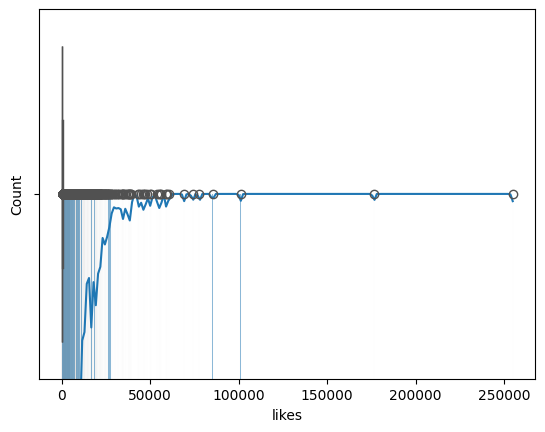

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(df['likes'], kde=True)
sns.boxplot(x=df['likes'])

In [ ]:
df['hour'] = df['datetime'].dt.hour
df['day_of_week'] = df['datetime'].dt.day_name()

In [ ]:
df['word_count'] = df['content'].apply(lambda x: len(x.split()))
df['char_count'] = df['content'].apply(len)

So some features that can be passed to a api requests are:-     
content---content of the tweet                     
time&date---time and date of the tweet                          
photo/videos---if the tweet has any media                  
word_count---for word coutn
lang---language of the tweet

The frontend can ask the user for similar things as are mentioned in the above cell

preprocessing:- something like                                
converting datetime stamps intoa ctual date and  time                         
handling the laguage of the tweets                             
handlingthe media                            
detecting language   

Can we calculate features (e.g., word count, has_media) inside the backend?          
***YES***               